In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *
init_printing()

In [2]:
x = [Symbol(f'x_{{{i}}}', real=True) for i in range(16)]
theta = [Symbol(f'\\theta_{{{i}}}', real=True) for i in range(len(x))]
b = Symbol(f'b', real=True)
Theta = theta + [b]

In [3]:
f = sum(x_*theta_ for x_,theta_ in zip(x,theta)) + b
f = tanh(f) #1/(1+exp(-f))
f

In [4]:
X = (np.random.rand(10, len(x))-0.5)*10
M = np.random.randn(len(x), 1)
Y = X @ M + np.random.randn()
Y = np.tanh(Y)

In [5]:
cost = (1/Y.shape[0])*sum([
    (f.subs({x_:x_sam_ for x_,x_sam_ in zip(x,x_sam)}) - y_sam)**2 for x_sam,y_sam in zip(X,Y)])

In [6]:
grads = [cost.diff(theta_) for theta_ in Theta]
curvs = [grad.diff(theta_) for grad,theta_ in zip(grads,Theta)]

In [7]:
hess = hessian(cost, Theta)
hess = [[lambdify(tuple(Theta), hess[y,x]) for x in range(len(Theta))] for y in range(len(Theta))]

In [8]:
cost = lambdify(tuple(Theta), cost)
grads = [lambdify(tuple(Theta), grad) for grad in grads]
curvs = [lambdify(tuple(Theta), curv) for curv in curvs]

### pure GD

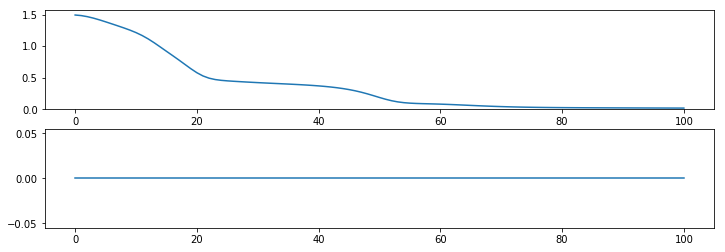

0.01742544978715132


In [9]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
mnt_old = 0.
beta = 0.9
for epoch in range(100):
    mnt_1 = np.zeros_like(para)
    for i in range(len(Theta)):
        mnt_1[i] = 1e-2*grads[i](*para)
    mnt_1 = beta*mnt_old + (1-beta)*mnt_1
    cost_1 = cost(*(para - mnt_1))
    cost_lowest = np.nanargmin([cost_1])
    cost_lowests.append(cost_lowest)
    mnt_old = [mnt_1][cost_lowest]
    para -= mnt_old
    cost_new = [cost_1][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### per parameter newton (update at the same time) with GD

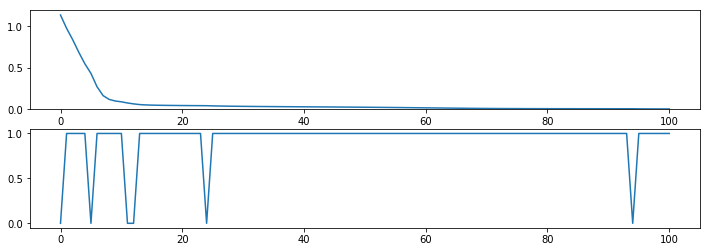

0.0032287952230866273


In [11]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
for epoch in range(100):
    para_1 = np.copy(para)
    para_2 = np.copy(para)
    for i in range(len(Theta)):
        para_1[i] = para[i] - grads[i](*para)/abs(curvs[i](*para))
        para_2[i] = para[i] - 1e-2*grads[i](*para)
    cost_1 = cost(*para_1)
    cost_2 = cost(*para_2)
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para = [para_1,para_2][cost_lowest]
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### per parameter newton (update at the same time) with GD+Moment

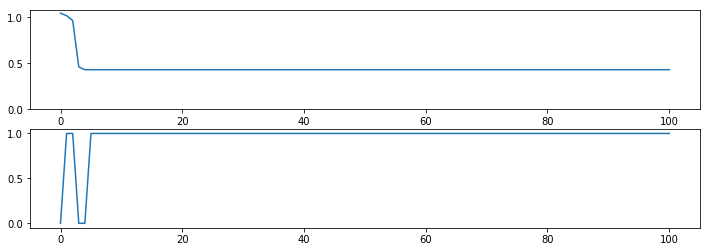

0.43003688845306753


In [10]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
mnt_old = 0.
beta = 0.9
for epoch in range(100):
    mnt_1 = np.zeros_like(para)
    mnt_2 = np.zeros_like(para)
    for i in range(len(Theta)):
        mnt_1[i] = grads[i](*para)/abs(curvs[i](*para))
        mnt_2[i] = 1e-2*grads[i](*para)
    mnt_2 = beta*mnt_old + (1-beta)*mnt_2
    cost_1 = cost(*(para - mnt_1))
    cost_2 = cost(*(para - mnt_2))
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para -= [mnt_1,mnt_2][cost_lowest]
    mnt_old = mnt_2
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### per parameter newton (update one by one) with GD

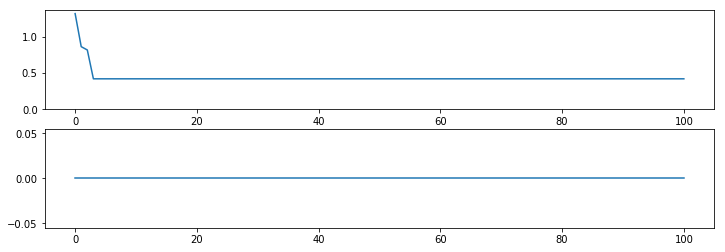

0.4213091189619799


In [12]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
for epoch in range(100):
    para_1 = np.copy(para)
    para_2 = np.copy(para)
    for i in range(len(Theta)):
        para_1[i] = para_1[i] - grads[i](*para_1)/abs(curvs[i](*para_1))
        para_2[i] = para[i] - 1e-2*grads[i](*para)
    cost_1 = cost(*para_1)
    cost_2 = cost(*para_2)
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para = [para_1,para_2][cost_lowest]
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### per parameter newton (update one by one) with GD+Moment

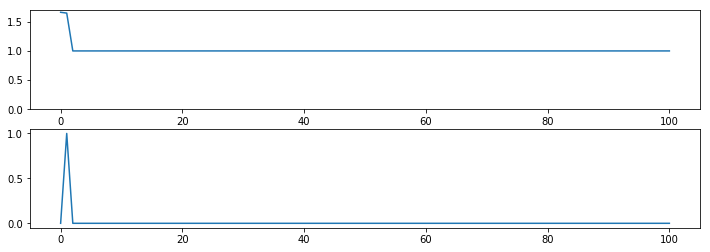

1.0012668387233628


In [13]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
mnt_old = 0.
beta = 0.9
for epoch in range(100):
    para_1 = np.copy(para)
    mnt_2 = np.zeros_like(para)
    for i in range(len(Theta)):
        para_1[i] = para_1[i] - grads[i](*para_1)/abs(curvs[i](*para_1))
        mnt_2[i] = 1e-2*grads[i](*para)
    mnt_2 = beta*mnt_old + (1-beta)*mnt_2
    cost_1 = cost(*(para_1))
    cost_2 = cost(*(para - mnt_2))
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para = [para_1,para-mnt_2][cost_lowest]
    mnt_old = mnt_2
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### newton hessian with GD

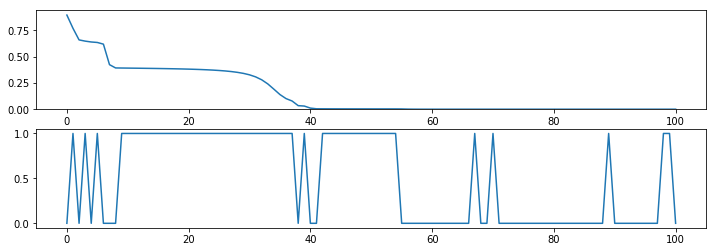

1.8430361527216792e-17


In [32]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
for epoch in range(100):
    para_1 = np.copy(para)
    para_2 = np.copy(para)
    g = np.array([grad(*para) for grad in grads])
    try:
        h_inv = np.linalg.inv(np.array([[h(*para) for h in hy] for hy in hess]))
        para_1 = para_1 - h_inv @ g
    except:
        para_1 = np.full_like(para_1, np.nan)
    for i in range(len(Theta)):
        para_2[i] = para[i] - 1e-2*grads[i](*para)
    cost_1 = cost(*para_1)
    cost_2 = cost(*para_2)
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para = [para_1,para_2][cost_lowest]
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### bb method with GD

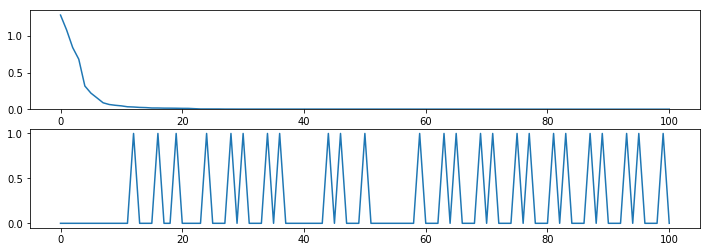

0.00012080836147452829


In [44]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
alpha = 1e-2
for epoch in range(100):
    para_1 = np.copy(para)
    para_2 = np.copy(para)
    g = np.array([grad(*para) for grad in grads])
    if epoch > 0:
        g_d = g - g_old
        para_d = para - para_1_old
        alpha = (para_d @ para_d) / (para_d @ g_d)
    g_old = np.copy(g)
    para_1_old = np.copy(para)
    para_1 = para - alpha*g
    for i in range(len(Theta)):
        para_2[i] = para[i] - 1e-2*grads[i](*para)
    cost_1 = cost(*para_1)
    cost_2 = cost(*para_2)
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para = [para_1,para_2][cost_lowest]
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)

### bb method with GD+Moment

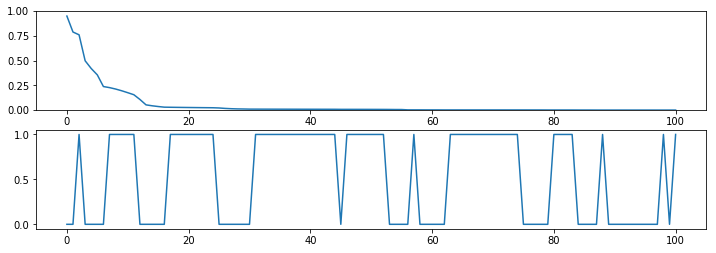

0.0013035332041550223


In [43]:
para = np.random.randn(len(Theta)) * (2/len(x))
cost_hist = [cost(*para)]
cost_lowests = [0]
mnt_old = 0.
beta = 0.9
alpha = 1e-2
for epoch in range(100):
    mnt_1 = np.zeros_like(para)
    mnt_2 = np.zeros_like(para)
    g = np.array([grad(*para) for grad in grads])
    if epoch > 0:
        g_d = g - g_old
        para_d = para - para_1_old
        alpha = (para_d @ para_d) / (para_d @ g_d)
    g_old = np.copy(g)
    para_1_old = np.copy(para)
    mnt_1 = alpha*g
    for i in range(len(Theta)):
        mnt_2[i] = 1e-2*grads[i](*para)
    mnt_2 = beta*mnt_old + (1-beta)*mnt_2
    cost_1 = cost(*(para - mnt_1))
    cost_2 = cost(*(para - mnt_2))
    cost_lowest = np.nanargmin([cost_1,cost_2])
    cost_lowests.append(cost_lowest)
    para -= [mnt_1,mnt_2][cost_lowest]
    mnt_old = mnt_2
    cost_new = [cost_1,cost_2][cost_lowest]
    cost_hist.append(cost_new)
plt.figure(figsize=(12,4))
plt.subplot(2,1,1)
plt.plot(cost_hist)
plt.ylim((0, None))
plt.subplot(2,1,2)
plt.plot(cost_lowests)
plt.show()
print(cost_new)